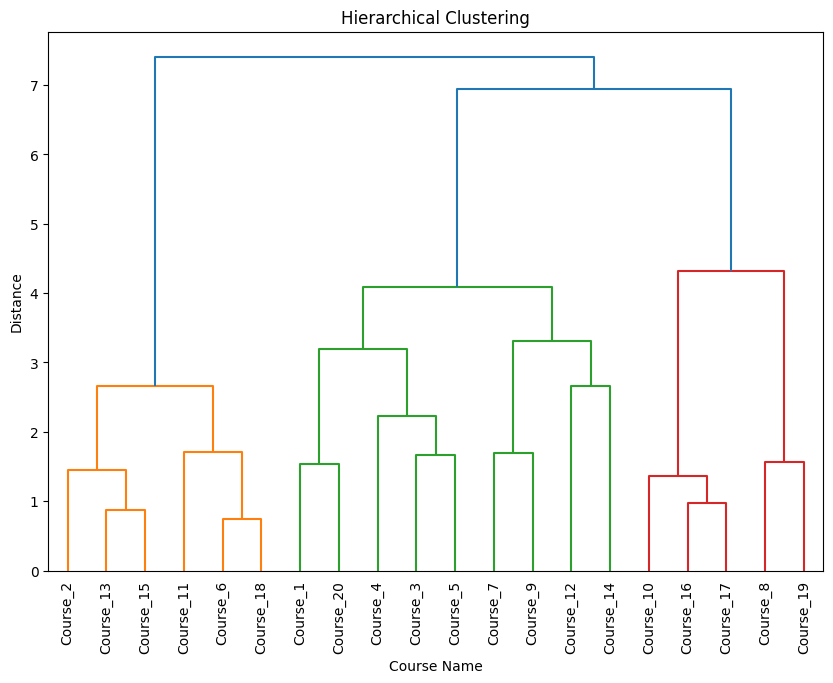

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dataset mla.csv'
data = pd.read_csv(file_path)

# Select relevant numeric columns for clustering
X = data[['Duration (hours)', 'Enrolled_Students', 'Completion_Rate (%)', 'Price ($)', 'Rating (out of 5)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering using 'ward' linkage method
Z = linkage(X_scaled, method='ward')

# Limit the number of labels for the dendrogram
max_courses = 20  # Adjust this number as needed
if len(data) > max_courses:
    labels = data['Course_Name'].values[:max_courses]
    Z = linkage(X_scaled[:max_courses], method='ward')
else:
    labels = data['Course_Name'].values

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering")
dendrogram(Z, labels=labels, leaf_rotation=90, leaf_font_size=10)
plt.xlabel("Course Name")
plt.ylabel("Distance")
plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster

# Load the dataset
file_path = '/content/dataset mla.csv'
data = pd.read_csv(file_path)

# Select relevant numeric columns for clustering
X = data[['Duration (hours)', 'Enrolled_Students', 'Completion_Rate (%)', 'Price ($)', 'Rating (out of 5)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering using 'ward' linkage method
Z = linkage(X_scaled, method='ward')

# Cut the dendrogram to form a fixed number of clusters (e.g., 3 clusters)
num_clusters = 3
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, clusters)

# Scaling function for Silhouette Score: from [-1, 1] to [0, 100]
def scale_silhouette_to_percentage(silhouette_score):
    return (silhouette_score + 1) * 50  # Shifts and scales to [0, 100]

# Scaling Calinski-Harabasz Index (normalizing to a hypothetical threshold max)
def scale_calinski_harabasz_to_percentage(calinski_score, max_threshold=2000):
    # Calinski-Harabasz: Scale with respect to a reasonable upper limit (threshold)
    return (calinski_score / max_threshold) * 100 if calinski_score < max_threshold else 100

# Scaling Davies-Bouldin Index (lower is better; we invert the scale)
def scale_davies_bouldin_to_percentage(davies_bouldin_score, max_threshold=5):
    # Assume max threshold (a reasonable value beyond which clustering is bad)
    scaled_value = (1 - (davies_bouldin_score / max_threshold)) * 100
    return max(0, scaled_value)  # Ensure the percentage stays positive

# Convert to percentage
silhouette_percentage = scale_silhouette_to_percentage(silhouette_avg)
calinski_harabasz_percentage = scale_calinski_harabasz_to_percentage(calinski_harabasz)
davies_bouldin_percentage = scale_davies_bouldin_to_percentage(davies_bouldin)

# Print the original scores and the results as percentages
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

print(f'\nSilhouette Score (as %): {silhouette_percentage:.2f}%')
print(f'Calinski-Harabasz Index (as %): {calinski_harabasz_percentage:.2f}%')
print(f'Davies-Bouldin Index (as %): {davies_bouldin_percentage:.2f}%')


Silhouette Score: 0.08746466789420734
Calinski-Harabasz Index: 1098.7742445510642
Davies-Bouldin Index: 2.4614933400568977

Silhouette Score (as %): 54.37%
Calinski-Harabasz Index (as %): 54.94%
Davies-Bouldin Index (as %): 50.77%
